In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
train_loader = DataLoader(
    datasets.MNIST('../dataset', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=1
)

In [4]:
image, label = next(iter(train_loader))

In [5]:
image.shape, label.shape

(torch.Size([1, 1, 28, 28]), torch.Size([1]))

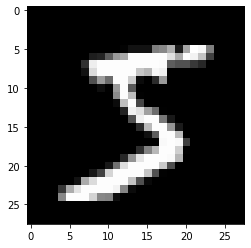

In [6]:
plt.imshow(image[0, 0, :, :], 'gray')
plt.show()

## 각 Layer별 설명

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### Convolution

In [8]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [9]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [10]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [11]:
weight = weight.detach().numpy()
weight.shape

(20, 1, 5, 5)

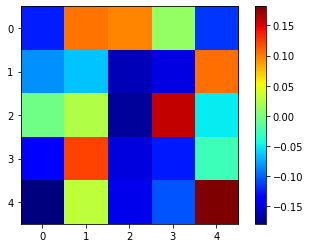

In [12]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [13]:
output_data = layer(image).data
output = output_data.cpu().numpy()
output.shape

(1, 20, 24, 24)

In [14]:
image_arr = image.numpy()
image_arr.shape

(1, 1, 28, 28)

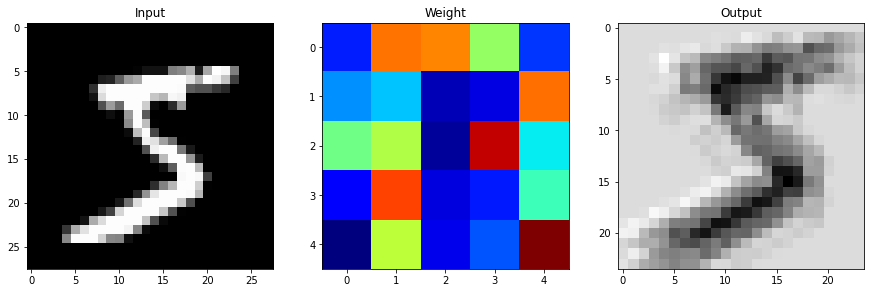

In [15]:
plt.figure(figsize=(15, 30))

plt.subplot(131)
plt.title('Input')
plt.imshow(np.squeeze(image_arr), 'gray')

plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0, 0, :, :], 'jet')

plt.subplot(133)
plt.title('Output')
plt.imshow(output[0, 0, :, :], 'gray')

plt.show()

### Pooling

In [16]:
pool = F.max_pool2d(image, 2, 2)
pool.shape

torch.Size([1, 1, 14, 14])

In [17]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 1, 14, 14)

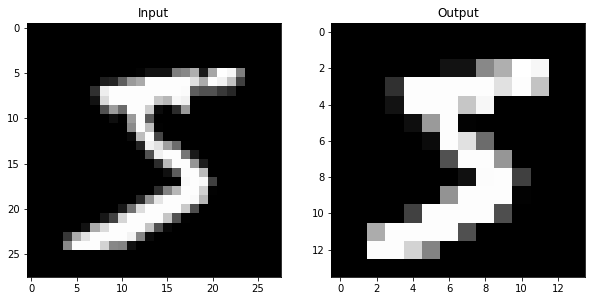

In [18]:
plt.figure(figsize=(10, 15))

plt.subplot(121)
plt.title('Input')
plt.imshow(np.squeeze(image_arr), 'gray')

plt.subplot(122)
plt.title('Output')
plt.imshow(np.squeeze(pool_arr), 'gray')

plt.show()

### Linear

In [19]:
flatten = image.view(1, 28*28)
flatten.shape

torch.Size([1, 784])

In [20]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [21]:
lin

tensor([[-0.2066, -0.3107,  0.2642, -0.1266,  0.1356, -0.2856, -0.0531,  0.1586,
          0.1490, -0.2965]], grad_fn=<AddmmBackward>)

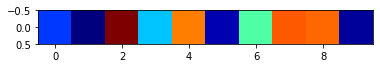

In [22]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.show()

### Softmax

In [23]:
with torch.no_grad():
    flatten = image.view(1, 28*28)
    lin = nn.Linear(784, 10)(flatten)
    softmax = F.softmax(lin, dim=1)

In [24]:
softmax

tensor([[0.0722, 0.1069, 0.0834, 0.0850, 0.1226, 0.0846, 0.1112, 0.0907, 0.1239,
         0.1196]])

In [25]:
np.sum(softmax.numpy())

1.0

## Layers 쌓기

In [26]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)
        
    def forward(self, x):
        # Feature Extraction
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        
        # Fully Connected Classification
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [27]:
model = Net()
res = model.forward(image)
res

tensor([[-2.2714, -2.2685, -2.3921, -2.3302, -2.3041, -2.2881, -2.2825, -2.3113,
         -2.2523, -2.3328]], grad_fn=<LogSoftmaxBackward>)